In [52]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import ceil, floor

In [53]:
folder='../datasets'
filename='gold-prices.csv'

In [54]:
import csv
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )

time_series = []
with open(f"{folder}/{filename}", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        for x in row:
            try:
                time_series.append(locale.atof((x)))
            except ValueError:
                print(x)
                pass

In [55]:
time_series=time_series[-300:]

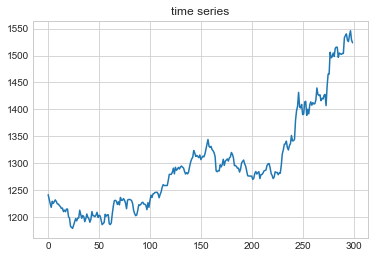

In [56]:
plt.style.use('seaborn-whitegrid')
plt.title("time series")
plt.plot(time_series)
plt.show()

In [57]:
int(ceil(max(time_series))-floor(min(time_series)))

369

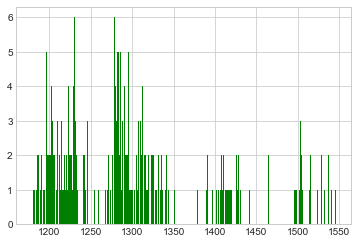

In [58]:
count, bins, ignored  = plt.hist(time_series, bins=int(ceil(max(time_series))-floor(min(time_series))), color='green')

In [59]:
import numpy as np


arrays = [np.array(time_series[:t]) for t in range(10,len(time_series))]

means = [ts.std() for ts in arrays]
vars = [ts.var() for ts in arrays]

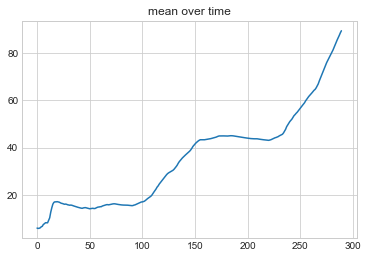

In [60]:
plt.title("mean over time")
plt.plot(means)
plt.show()

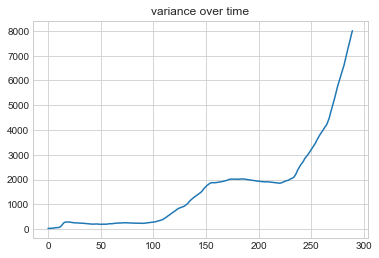

In [61]:
plt.title("variance over time")
plt.plot(vars)
plt.show()

In [62]:
def ACOV(X, h):
    avg = sum(X)/len(X)
    covv = [(X[t + h] - avg) * (X[t] - avg) for t in range (0, len(X) - h)]
    return (1.0 / len(X)) * sum(covv)

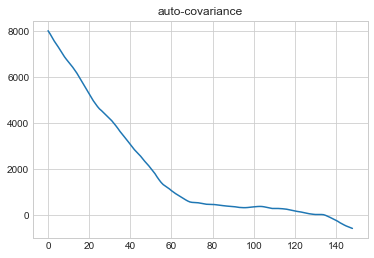

In [63]:
plt.title("auto-covariance")
acov = [ACOV(time_series,h) for h in range(1, int(len(time_series)/2))] 
plt.plot(acov)
plt.show()